<a href="https://colab.research.google.com/github/DousMoon/ml0804/blob/master/cnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from tensorflow.keras.datasets.cifar10 import load_data
(x_train, y_train), (x_test, y_test) = load_data()

In [2]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(50000, 32, 32, 3)
(50000, 1)
(10000, 32, 32, 3)
(10000, 1)


In [3]:
trans = ["airplane",										
      "automobile",										
      "bird",										
      "cat",										
      "deer",										
      "dog",										
      "frog",										
      "horse",										
      "ship",										
      "truck"]

答案: cat


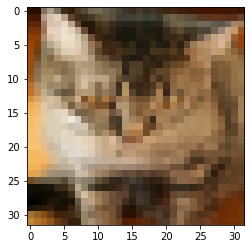

In [4]:
import matplotlib.pyplot as plt
import random
idx = random.randint(0, x_train.shape[0])
print("答案:", trans[y_train[idx][0]])
plt.imshow(x_train[idx])

In [ ]:
# stride2 捲積 = conv+pooling (捲積+池化最好)
# Dropout 刻意丟掉約0.25~0.5
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.layers import Flatten, Dense, Dropout
from tensorflow.keras.models import Sequential
layers = [
      Conv2D(64, 3, padding="same", activation="relu", input_shape=(32, 32, 3)),
      MaxPooling2D(),
      Conv2D(128, 3, padding="same", activation="relu"),
      MaxPooling2D(),
      Conv2D(256, 3, padding="same", activation="relu"),
      MaxPooling2D(),
      Flatten(),
      Dense(512, activation="relu"),
      Dropout(0.25),
      Dense(10, activation="softmax")
]
model = Sequential(layers)
model.summary()

In [21]:
from tensorflow.keras.losses import SparseCategoricalCrossentropy
model.compile(loss=SparseCategoricalCrossentropy(),
        optimizer="adam",
        metrics=["accuracy"])

In [22]:
x_train_norm = x_train/255
x_test_norm = x_test/255

In [23]:
# batch:看幾筆在調整一次(20-200)
# epochs:整份訓練資料看幾遍 (10->60000*10)
# verbose: 0(quite), 1(default), 2(best)
from tensorflow.keras.callbacks import ModelCheckpoint,EarlyStopping
callbacks =[
       ModelCheckpoint("cnn.h5", save_best_only=True),
       EarlyStopping(patience=5, restore_best_weights=True)
      ]
model.fit(x_train_norm,
     y_train,
     validation_split=0.1,
     batch_size=200,
     epochs=100,
     verbose=2,
     callbacks=callbacks)

Epoch 1/100
225/225 - 3s - loss: 1.5592 - accuracy: 0.4332 - val_loss: 1.1930 - val_accuracy: 0.5762
Epoch 2/100
225/225 - 3s - loss: 1.1053 - accuracy: 0.6090 - val_loss: 0.9448 - val_accuracy: 0.6686
Epoch 3/100
225/225 - 3s - loss: 0.8990 - accuracy: 0.6834 - val_loss: 0.8235 - val_accuracy: 0.7104
Epoch 4/100
225/225 - 3s - loss: 0.7818 - accuracy: 0.7261 - val_loss: 0.8091 - val_accuracy: 0.7216
Epoch 5/100
225/225 - 3s - loss: 0.6698 - accuracy: 0.7663 - val_loss: 0.7157 - val_accuracy: 0.7560
Epoch 6/100
225/225 - 3s - loss: 0.5909 - accuracy: 0.7947 - val_loss: 0.6969 - val_accuracy: 0.7614
Epoch 7/100
225/225 - 3s - loss: 0.5012 - accuracy: 0.8249 - val_loss: 0.6987 - val_accuracy: 0.7624
Epoch 8/100
225/225 - 3s - loss: 0.4345 - accuracy: 0.8491 - val_loss: 0.6761 - val_accuracy: 0.7768
Epoch 9/100
225/225 - 3s - loss: 0.3546 - accuracy: 0.8757 - val_loss: 0.6783 - val_accuracy: 0.7864
Epoch 10/100
225/225 - 3s - loss: 0.2953 - accuracy: 0.8980 - val_loss: 0.7661 - val_accura

In [24]:
model.evaluate(x_test_norm, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.7211 - accuracy: 0.7628


[0.7210572957992554, 0.7627999782562256]